In [24]:
import numpy as np
import os, sys
import pandas as pd
import scipy.stats
import scipy.io as spio


# root directory is 2 dirs up from this file
# path = os.path.realpath(__file__).split('/')
# root = '/'+os.path.join(*path[0:-3])
root = '/usr/local/serenceslab/maggie/shapeDim/'
sys.path.append(os.path.join(root, 'Analysis'))


import matplotlib.pyplot as plt

from code_utils import data_utils, file_utils, plot_utils

In [3]:
subjects = np.arange(1,8)

make_time_resolved = False
use_bigIPS = True
concat_IPS = True;

# first load all data for all subjects, both tasks
maindat_all = []; 
repdat_all = []
mainlabs_all = []; 
replabs_all = []

maindat_avg = []; 
repdat_avg = []

for si, ss in enumerate(subjects):

    print('loading S%02d, main task'%ss)
    main_data_avg, _, main_labels, roi_names = data_utils.load_main_task_data(ss, make_time_resolved, \
                                                                                use_bigIPS, concat_IPS)

    maindat_avg += [main_data_avg]
    
    mainlabs_all += [main_labels]

    print('loading S%02d, repeat task'%ss)
    rep_data_avg, _, rep_labels, roi_names = data_utils.load_repeat_task_data(ss, make_time_resolved, \
                                                                                use_bigIPS, concat_IPS)

    repdat_avg += [rep_data_avg]
    
    replabs_all += [rep_labels]

loading S01, main task
loading S01, repeat task
loading S02, main task
loading S02, repeat task
loading S03, main task
loading S03, repeat task
loading S04, main task
loading S04, repeat task
loading S05, main task
loading S05, repeat task
loading S06, main task
loading S06, repeat task
loading S07, main task
loading S07, repeat task


In [38]:
from matplotlib import cm
task_names = ['Linear (1)','Linear (2)','Checker'];
n_tasks = len(task_names)
task_colors = np.flipud(cm.GnBu(np.linspace(0,1,5))[2:5,:])


nTRs_concat = 14;
time_axis = np.arange(0,nTRs_concat) * 0.8

avgTRs_targ = [4,7];
# avgTRs_targ = [3,7];

n_subjects = len(subjects)
n_rois = len(roi_names)


In [39]:
trial_group_names = ['easy','hard']
n_trial_groups = 2;
trial_group_means = np.zeros((n_subjects, n_rois, n_tasks, n_trial_groups))

for si in range(n_subjects):
    
    l = pd.concat([mainlabs_all[si], replabs_all[si]], axis=0)
    
    for ri in range(n_rois):
        
        d = np.concatenate([maindat_avg[si][ri], repdat_avg[si][ri]], axis=0)

    
        for ti, task_ind in enumerate([1,2,3]):
 
            tasklabs = np.array(l['task'])
            is_main_grid = np.array(l['is_main_grid']==1)
            # dist = np.array(mainlabs_all[si]['dist_from_bound%d'%task_ind]).round(2)

            inds1 = (tasklabs==task_ind) & is_main_grid
            inds2 = (tasklabs==task_ind) &  ~is_main_grid
                
            # print(np.sum(inds1), np.sum(inds2), np.sum(inds3))

            assert(np.sum(inds1)+np.sum(inds2)==np.sum(tasklabs==task_ind))

            d1 = np.mean(np.mean(d[inds1,:], axis=1), axis=0)
            
            trial_group_means[si,ri,ti,0] = d1
            
            d2 = np.mean(np.mean(d[inds2,:], axis=1), axis=0)
            
            trial_group_means[si,ri,ti,1] = d2
 

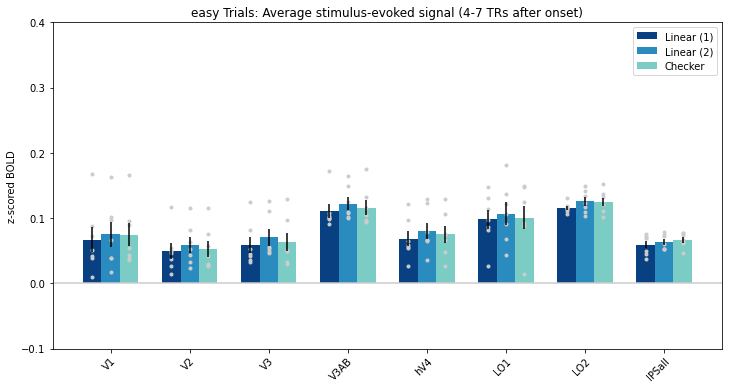

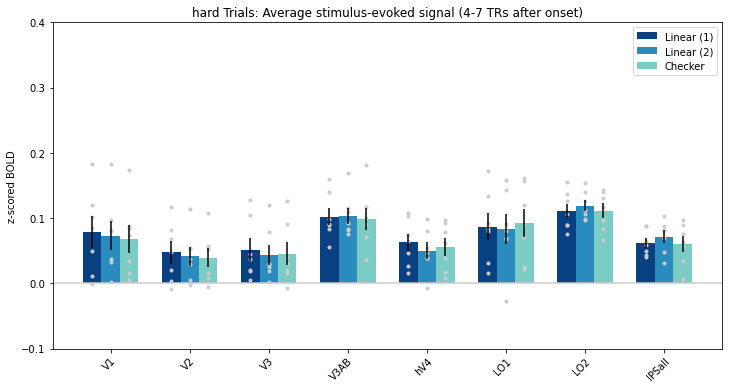

In [40]:
for tgi, name in enumerate(trial_group_names):
    
    vals = trial_group_means[:,:,:,tgi]


    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subjects-1)

    plot_utils.plot_multi_bars(mean_data = meanvals, \
                               err_data = semvals, \
                               point_data = vals, \
                               add_ss_lines=False,
                               colors = task_colors, \
                               space = 0.15, \
                               title = '%s Trials: Average stimulus-evoked signal (4-7 TRs after onset)'%name, \
                               ylim = [-0.1, 0.4], \
                               horizontal_line_pos = 0,
                               xticklabels = roi_names, \
                               ylabel = 'z-scored BOLD', \
                               legend_overlaid=True, \
                               legend_separate=False, \
                           legend_labels = np.array(task_names));

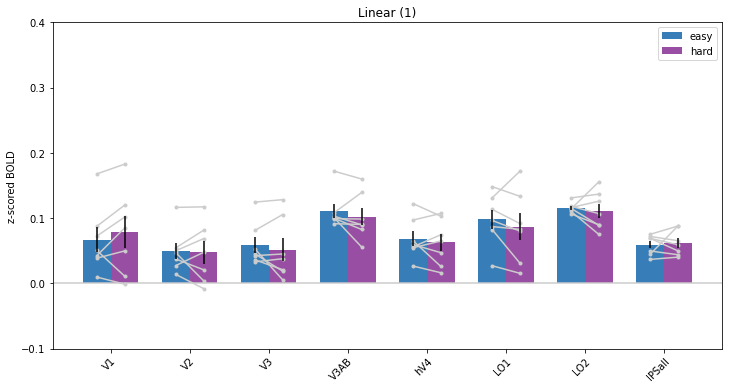

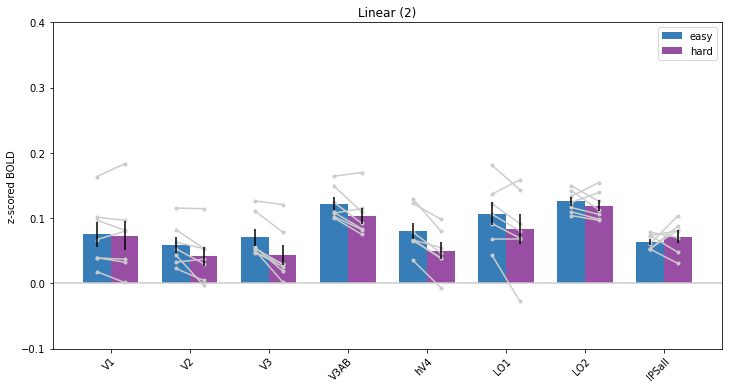

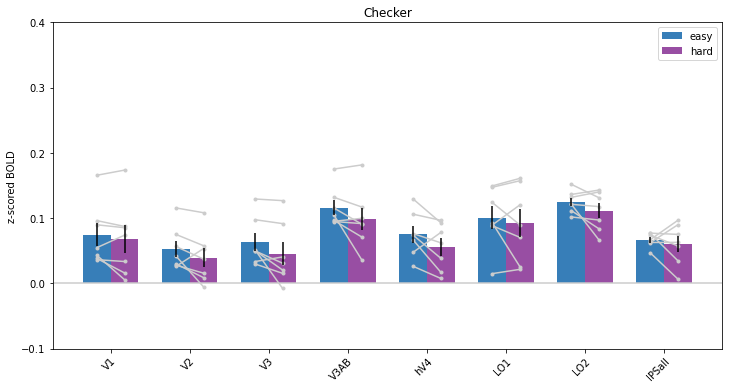

In [41]:
colors = cm.Set1(np.linspace(0,1,9))[[1,3],:]

for ti in range(3):

    vals = trial_group_means[:,:,ti,:]


    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subjects-1)

    plot_utils.plot_multi_bars(mean_data = meanvals, \
                               err_data = semvals, \
                               point_data = vals, \
                               add_ss_lines=True, \
                               colors = colors, \
                               space = 0.15, \
                               title = '%s'%task_names[ti], \
                               ylim = [-0.1, 0.4], \
                               horizontal_line_pos = 0,
                               xticklabels = roi_names, \
                               ylabel = 'z-scored BOLD', \
                               legend_overlaid=True, \
                               legend_separate=False, \
                               legend_labels = np.array(trial_group_names));